In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('retail_clean.csv')
df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [4]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [8]:

df['InvoiceDate']=df['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [9]:
df['date']=pd.to_datetime(df['InvoiceDate'])

In [13]:
df['month']=df.date.dt.month
df['year']=df.date.dt.year
df['week']=df.date.dt.isocalendar().week

In [14]:
df

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,month,year,week
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.40,2009-12-01,12,2009,49
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,2009-12-01,12,2009,49
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.00,2009-12-01,12,2009,49
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.80,2009-12-01,12,2009,49
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.00,2009-12-01,12,2009,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-12-09,12,2011,49
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-12-09,12,2011,49
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-12-09,12,2011,49
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,14.85,2011-12-09,12,2011,49


In [16]:
time_series=df.groupby(['week','month','year']).aggregate(
        date=('date','first'),
        total_sales=('Quantity',np.sum)
    ).reset_index().sort_values('date')

In [18]:

time_series

,week,month,year,date,total_sales
113,49,12,2009,2009-12-01,138612
116,50,12,2009,2009-12-07,109644
118,51,12,2009,2009-12-14,125772
120,52,12,2009,2009-12-21,24680
0,1,1,2010,2010-01-04,95950
...,...,...,...,...,...
106,46,11,2011,2011-11-14,156756
108,47,11,2011,2011-11-21,154179
110,48,11,2011,2011-11-28,78241
112,48,12,2011,2011-12-01,61655


<Axes: xlabel='date', ylabel='total_sales'>

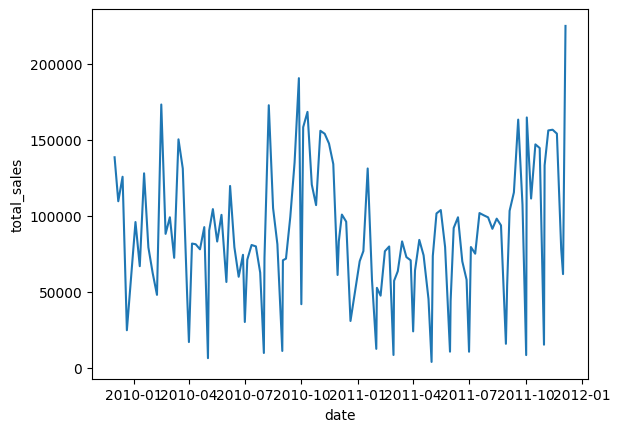

In [19]:
sns.lineplot(x='date',y='total_sales',data=time_series)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
time_series['trend']=range(time_series.shape[0])

In [22]:
time_series['month']=time_series['month'].astype('category')

In [25]:
x=time_series.drop(['week','year','date','total_sales'],axis=1)

In [26]:
x.columns

Index(['month', 'trend'], dtype='object')

In [33]:
y=time_series['total_sales'].values

In [29]:
names=pd.get_dummies(x).columns

In [31]:
x=pd.get_dummies(x).values

In [34]:
model=LinearRegression()

In [35]:
model.fit(x,y)

LinearRegression()

In [36]:
dict=list(zip(names,model.coef_))

In [37]:
dict

[('trend', np.float64(-113.07865930370264)),
 ('month_1', np.float64(-9450.768768915492)),
 ('month_2', np.float64(-18017.410432087472)),
 ('month_3', np.float64(-3649.8968130932844)),
 ('month_4', np.float64(-23859.603516574753)),
 ('month_5', np.float64(-18251.54696941785)),
 ('month_6', np.float64(-11580.17759388589)),
 ('month_7', np.float64(-17103.184297367385)),
 ('month_8', np.float64(-8681.396740017211)),
 ('month_9', np.float64(26029.141625321507)),
 ('month_10', np.float64(23792.13453611478)),
 ('month_11', np.float64(49253.8675480104)),
 ('month_12', np.float64(11518.841421912666))]

In [39]:
preds=model.predict(x)

In [41]:
time_series['predictions']=preds

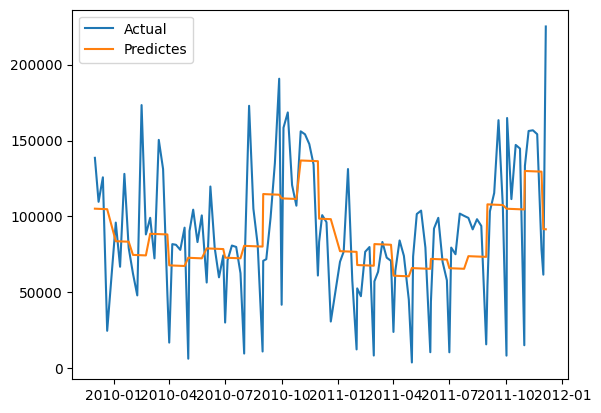

In [43]:
plt.plot(time_series.date,time_series.total_sales,label='Actual')

plt.plot(time_series.date,time_series.predictions,label='Predictes')
plt.legend()
plt.show()